In [ ]:
from sbi_feature_importance.experiment_helper import SimpleDB
from sbi_feature_importance.utils import skip_dims
from sbi_feature_importance.analysis import compare_kls

from ephys_helper.hh_simulator import HHSimulator

import torch
import matplotlib.pyplot as plt

import matplotlib as mpl
import pandas as pd
import seaborn as sns
from sbi.analysis import pairplot

import time
import IPython.display as IPd
from svgutils.compose import *

In [ ]:
results_db = SimpleDB("../results/fig3", "r")
data_db = SimpleDB("../results/HH1M", "r")

In [3]:
model_params = data_db.query("model_parameters")
stimulus = data_db.query("stimulus_protocol")
hh = HHSimulator()
hh.set_static_parameters(model_params)
hh.set_stimulus(protocol_params=stimulus)


theta_o = data_db.query("theta_o")
t_o, Vt_o, It_o =  hh.simulate(theta_o, -70, stimulus_noise=0)

batch size was automatically set to 1.


Running 1 tasks with 1 batches per worker.: 100%|██████████| 1/1 [00:04<00:00,  4.02s/it]


In [4]:
thetas_full = results_db.query("posthoc_experimental_mcmc_2_1_1_00_[0, 1, 2, 3, 8, 18, 19, 21, 22]")
thetas_no_APT = results_db.query("posthoc_experimental_mcmc_2_1_1_00_[1, 2, 3, 8, 13, 18, 19, 21, 22]")
thetas_no_APA = results_db.query("posthoc_experimental_mcmc_2_1_1_00_[0, 2, 3, 8, 13, 18, 19, 21, 22]")

In [5]:
all_dims = list(range(10))
dims = [all_dims] + skip_dims(all_dims)[:4]
hh = HHSimulator()
hh.set_static_parameters(new_model_params=data_db.query("model_parameters"))
prior = data_db.query("prior")
limits = torch.stack([prior.base_prior.base_dist.low, prior.base_prior.base_dist.high]).T
params = list(hh.parameters(include_units=False).keys())

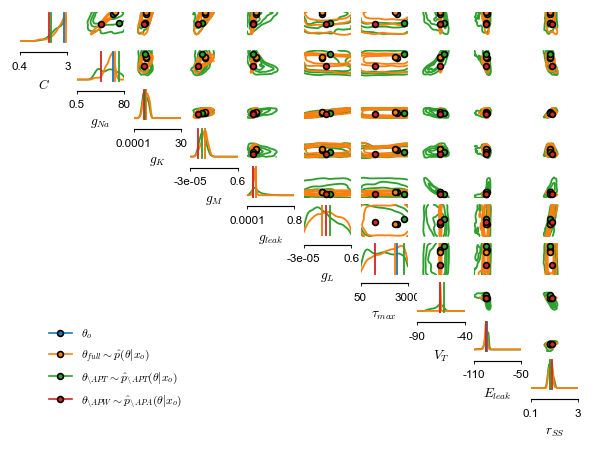

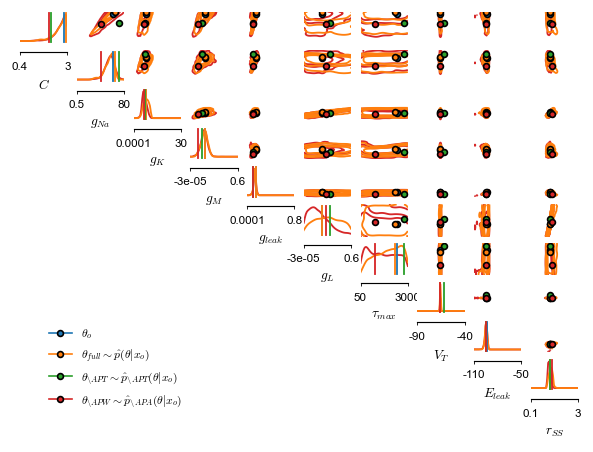

In [21]:
points = [theta_o, thetas_full[0], thetas_no_APT[49], thetas_no_APA[0]]
marker_colors = ["tab:blue", "tab:orange", "tab:green", "tab:red"]

with mpl.rc_context(fname=".mpl_rc"):
    fig, axes = pairplot([thetas_no_APT,thetas_full], 
    figsize=(6,4), diag="kde", 
    limits = limits, labels=params, ticks=limits,  
    contour_offdiag= {'levels': [0.01,0.1,0.3], 'percentile': False}, 
    points=points, upper="contour", 
    points_colors=marker_colors, 
    points_offdiag={"markersize": 3.5, "mew": 1, "marker": "o", "lw": 1, "alpha":1, "markeredgecolor":"k"},
    points_diag={"lw": 1.1, "alpha":1, "ls":"solid"})
    
    blueto = "tab:green"
    orangeto = "tab:orange"
    greento = "tab:red"
    redto = "tab:blue"

    colors = {"#1f77b4":blueto, "#ff7f0e":orangeto, "#2ca02c":greento, "#d62728":redto, "black":"black", "tab:blue":blueto,"tab:orange":orangeto,"tab:green":greento,"tab:red":redto}
    for axe in axes:
        for ax in axe:
            for color, line in zip(colors, ax.collections):
                line.set_edgecolor(colors['#%02x%02x%02x' %tuple((line.get_edgecolor()[0,:3]*255).astype(int))])
                line.set_linewidth(1.1)
            for color, line in zip(colors, ax.lines):
                if line.get_color() in marker_colors:
                    pass
                else:
                    line.set_color(colors[line.get_color()])
                    line.set_linewidth(1.1)
    fig.legend(handles=[line for line in axes[0,1].lines if line.get_color() in marker_colors], labels=[r"$\theta_o$", r"$\theta_{full} \sim \hat{p}(\theta|x_o)$", r"$\theta_{\backslash APT} \sim \hat{p}_{\backslash APT}(\theta|x_o)$", r"$\theta_{\backslash APW} \sim \hat{p}_{\backslash APA}(\theta|x_o)$"], loc=3, bbox_to_anchor=(0.15,0.05))
    plt.savefig("../paper/fig3/svg/appendix1_panel_a.svg")
plt.show()

with mpl.rc_context(fname=".mpl_rc"):
    fig, axes = pairplot([thetas_no_APA,thetas_full],
    figsize=(6,4), diag="kde", 
    limits = limits, labels=params, ticks=limits, 
    points=points, upper="contour", 
    contour_offdiag= {'levels': [0.01,0.1,0.3], 'percentile': False},  
    points_colors=marker_colors, 
    points_offdiag={"markersize": 3.5, "mew": 1, "marker": "o", "lw": 1, "alpha":1, "markeredgecolor":"k"},
    points_diag={"lw": 1.1, "alpha":1, "ls":"solid"})
    blueto = "tab:red"
    orangeto = "tab:orange"
    greento = "tab:red"
    redto = "tab:blue"

    colors = {"#1f77b4":blueto, "#ff7f0e":orangeto, "#2ca02c":greento, "#d62728":redto, "black":"black", "tab:blue":blueto,"tab:orange":orangeto,"tab:green":greento,"tab:red":redto}
    for axe in axes:
        for ax in axe:
            for color, line in zip(colors, ax.collections):
                line.set_edgecolor(colors['#%02x%02x%02x' %tuple((line.get_edgecolor()[0,:3]*255).astype(int))])
                line.set_linewidth(1.1)

            for color, line in zip(colors, ax.lines):
                if line.get_color() in marker_colors:
                    pass
                else:
                    line.set_color(colors[line.get_color()])
                    line.set_linewidth(1.1)
    fig.legend(handles=[line for line in axes[0,1].lines if line.get_color() in marker_colors], labels=[r"$\theta_o$", r"$\theta_{full} \sim \hat{p}(\theta|x_o)$", r"$\theta_{\backslash APT} \sim \hat{p}_{\backslash APT}(\theta|x_o)$", r"$\theta_{\backslash APW} \sim \hat{p}_{\backslash APA}(\theta|x_o)$"], loc=3, bbox_to_anchor=(0.15,0.05))
    plt.savefig("../paper/fig3/svg/appendix1_panel_b.svg")
plt.show()

In [22]:
# takes a while to render all the different points
def svg(img):
    IPd.display(IPd.HTML('<img src="{}" / >'.format(img, time.time())))

svg_scale = 1.25  # set this to 1.25 for Inkscape, 1.0 otherwise

# Panel letters in Helvetica Neue, 12pt, Medium
kwargs_text = {'size': '12pt', 'font': 'Arial', 'weight': '800'}

f = Figure("12.5cm", "18.6cm",
# f = Figure("20.3cm", "21.3cm",
           
Panel(
        SVG("../paper/fig3/svg/appendix1_panel_a.svg").scale(svg_scale),
        Text("a", -5, 2.0, **kwargs_text),
).move(10, 20),

Panel(
        SVG("../paper/fig3/svg/appendix1_panel_b.svg").scale(svg_scale),
        Text("b", -5, 2.0, **kwargs_text),
).move(10, 360),
)

!mkdir -p fig
f.save("../paper/fig3/svg/appendix_fig1.svg")
svg("../paper/fig3/svg/appendix_fig1.svg")